# Table of Contents
* [1. Processamento digital de áudio 1](#1.-Processamento-digital-de-áudio-1)
	* [1.1 Autor: João Marcos Costa](#1.1-Autor:-João-Marcos-Costa)
		* [1.1.1 Data: 23/03/2017 (última atualização)](#1.1.1-Data:-23/03/2017-%28última-atualização%29)
	* [1.2 Sinais](#1.2-Sinais)
	* [1.3 Notas musicais](#1.3-Notas-musicais)
	* [1.4 Plotagem de sinal de áudio](#1.4-Plotagem-de-sinal-de-áudio)
	* [1.5 Passo-a-passo:](#1.5-Passo-a-passo:)
		* [1.5.1 Importando o sinal](#1.5.1-Importando-o-sinal)
		* [1.5.2 Importando o módulo de plotagem](#1.5.2-Importando-o-módulo-de-plotagem)
		* [1.5.3 Criando o primeiro gráfico](#1.5.3-Criando-o-primeiro-gráfico)
		* [1.5.4 Escolhendo os títulos](#1.5.4-Escolhendo-os-títulos)
		* [1.5.5 Plotagem dos dados](#1.5.5-Plotagem-dos-dados)
		* [1.5.6 Criando o segundo gráfico](#1.5.6-Criando-o-segundo-gráfico)
		* [1.5.7 Visualizando os resultados](#1.5.7-Visualizando-os-resultados)
		* [1.5.8 Código completo:](#1.5.8-Código-completo:)
	* [1.6 Gerando e reproduzindo o áudio a partir do array](#1.6-Gerando-e-reproduzindo-o-áudio-a-partir-do-array)
	* [1.7 Geração de áudios genéricos e notas musicais](#1.7-Geração-de-áudios-genéricos-e-notas-musicais)
		* [1.7.1 Detalhes do código](#1.7.1-Detalhes-do-código)
	* [1.8 Plotagem das notas](#1.8-Plotagem-das-notas)


# 1. Processamento digital de áudio 1

## 1.1 Autor: João Marcos Costa

### 1.1.1 Data: 23/03/2017 (última atualização)

## 1.2 Sinais

Sinais são funções de uma ou mais variáveis que fornecem informações  sobre um  determinado  fenômeno o  (LATHI,  1998;  PROAKIS;  MANOLAKIS,  1996). Estes podem ser caracterizados de duas formas:

- Sinais contínuos no tempo: Um sinal é de tempo contínuo se a sua amplitude varia continuamente com o tempo "t". Isso significa que para cada tempo "t" o sinal y(t) é definido com um valor real.

<img src = "./handsOn3_matlab_figs/senoide_continua.jpg">


- Sinais discretos no tempo: Um sinal de tempo discreto pode ser definido em instantes isolados, separados geralmente  de  maneira  uniforme. Dessa forma, apenas números inteiros "n" a função será definida.

<img src = "./handsOn3_matlab_figs/senoide_discreta.jpg">
Exemplos clássicos de sinais seriam: 
- Ondas elétromagnéticas;
- Ondas mecânicas (som);
- Tensão e corrente:

## 1.3 Notas musicais

Um trecho de áudio, como uma nota musical, é uma onda, ou composição de ondas, mecânica. Suas características são a frequência (_f_), amplitude (_A_) e timbre. Podemos sintetizar ondas supondo valores para essas características através da equação:
$$ S(t) = A\cos{(2\pi ft)} \hspace{20mm} (6) $$
Se uma pessoa A emite a nota Dó com sua voz, e outra pessoa B também emite, notamos um aspecto particular para cada uma das notas, embora sejam a mesma. Essa diferença sutil que caracteriza cada voz é conhecida como timbre, tendo uma representação mais elaborada que a amplitude e frequência, e será detalhada posteriormente. 

- Notas puras sintetizadas são senoidais perfeitas, com apenas uma frequência, sem decaimento
- Notas emitidas ao tocar a corda de uma guitarra, por exemplo, são uma composição de ondas, e possuem decaimento (_ver plotagem abaixo_)

## 1.4 Plotagem de sinal de áudio

## 1.5 Passo-a-passo:

### 1.5.1 Importando o sinal

Precisamos de um arquivo de áudio, e usaremos um .wav nesse exemplo. O áudio será lido como um vetor de inteiros (ou _floats_):
```python
import numpy as np
import scipy.io.wavfile as wv
[fs,sinal] = wv.read('guitar.wav')
t = np.linspace(0,len(sinal)/fs,len(sinal))
```

- Numpy é biblioteca principal para funções matemáticas e arrays (vetores e matrizes)
- 'import' importa módulos/bibliotecas do python, equivalente ao #include<> de C/C++
- Scipy é um módulo para métodos numéricos, 'io' é um módulo interno da scipy, relacionado à entrada (input, 'i') e saída ('output','o') de arquivos, e 'wavfile' é o módulo específico para leitura e escrita de arquivos .wav (áudios)
- 'as' permite dar um 'apelido' ao módulo para não precisar escrever seu nome todo quando formos usar suas funções e classes. Se não usássemos esse recurso, o código seria:
```python
import numpy 
import scipy.io.wavfile 
[fs,sinal] = scipy.io.wavfile.read('guitar.wav')
t = numpy.linspace(0,len(sinal)/fs,len(sinal))
```

- wv.read('arquivo_de_audio.wav') é uma função de duplo retorno: retorna a frequência de amostragem, que resolvi armazenar na variável 'fs', enquanto o segundo retorno é um array com as amostras (de amplitude) ordenadas do áudio. 
- np.linspace cria um array com N elementos, começando em A e terminando em B, como em 'exemplo = np.linspace(A,B,N)'
- 't' é o array com valores de tempo correspondentes à duração do sinal.

### 1.5.2 Importando o módulo de plotagem

Plotaremos o sinal original, com os mesmos valores de amplitude de quando foi importado, e o sinal amplificado x2.0 logo abaixo. O módulo (ou biblioteca) Matplotlib tem as funções e classes para desenhar gráficos em 2D e 3D.
```python
%matplotlib notebook
from matplotlib import pyplot as plt 
plt.figure(1,[10,7]) 
grafico_1 = plt.subplot(311) 
```

- '%matplotlib notebook' é um recurso da Jupyter conhecido como _magic_, e o parâmetro _notebook_ permite que os gráficos da matplotlib sejam interativos. Outra possibilidade seria '%matplotlib inline', que faz os gráficos serem estáticos.
- para mais particularidades e truques, clique [aqui](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- a segunda linha faz o mesmo que 'import matplotlib.pyplot as plt'
- plt.figure() cria uma instância da classe _figure_, como se fosse uma figura em branco, onde iremos fazer os gráficos, e a 'caixa' dos gráficos, tem 10x7 polegadas.

### 1.5.3 Criando o primeiro gráfico

```python
grafico_1 = plt.subplot(311) 
```

- o método _plt.subplot(XYN)_ inicia uma plotagem múltipla (subplotagem). 
- Na plotagem múltipla, o usuário escolhe o número de células para conter os gráficos, como elas vão se dispor e em qual célula  quer desenhar.
- X é o número de linhas, Y o de colunas e N é a célula selecionada para inserir o gráfico
- Neste caso: 3 linhas, 1 coluna, operando a célula 1

### 1.5.4 Escolhendo os títulos

Podemos definir o título do gráfico e dos seus eixos, mas são funções opcionais.
```python
plt.title('Sinal original')

plt.xlabel('Tempo') #título do eixo X
plt.ylabel('Amplitude')#título do eixo Y
```

### 1.5.5 Plotagem dos dados

```python
plt.plot(t,sinal) #plota os valores do sinal em função do tempo
```

### 1.5.6 Criando o segundo gráfico

Como se trata, agora, de um sinal amplificado, precisamos construir o _array_:
```python
sinal_2 = 2*sinal #amplificamos o sinal dobrando o valor de suas amostras
```

Procedendo como no primeiro gráfico:
```python
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.plot(t,sinal_2)
```

### 1.5.7 Visualizando os resultados

Escolheremos os limites de exibição para os valores verticais (eixo y):
```python
grafico_1.set_ylim([-40000,40000])
grafico_2.set_ylim([-40000,40000])
```

Finalmente, exibiremos na tela:
```python
plt.show()
```

### 1.5.8 Código completo:

<IPython.core.display.Javascript object>


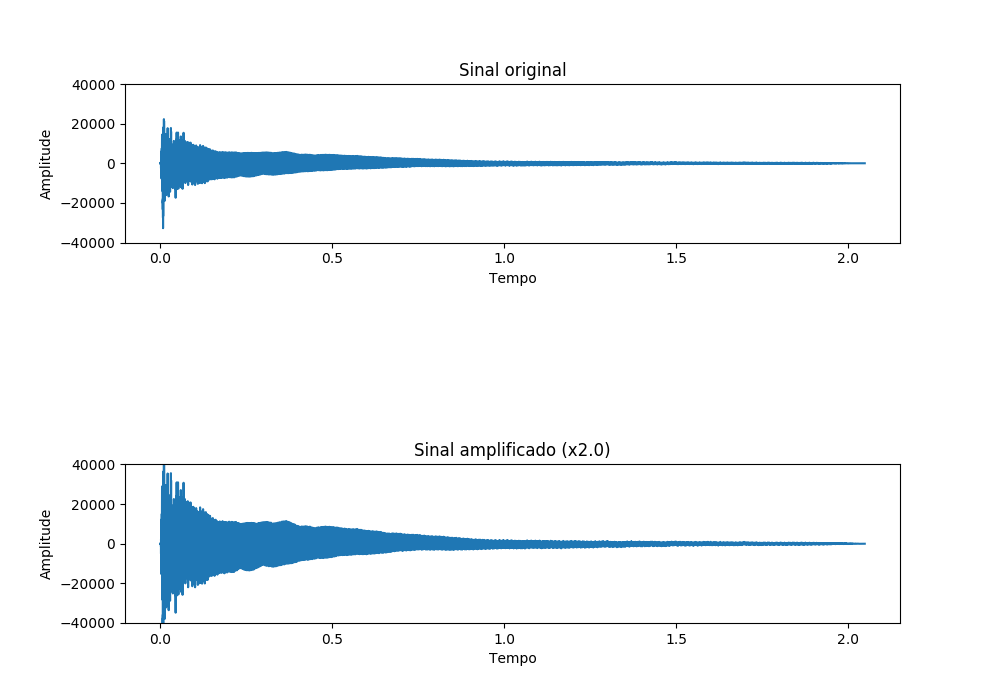

In [1]:
# o comando acima permite um gráfico interativo
# %matplotlib inline : gráficos estáticos
import numpy as np #biblioteca de vetores e funções matemáticas
import scipy.io.wavfile as wv #bib. para ler/escrever arquivos .wav
[fs,sinal] = wv.read('guitar.wav') 
sinal=sinal*1.0 #forçando a conversão de int para float
#retorna a frequência de amostragem 'fs' e um array com as amostras 
t = np.linspace(0,len(sinal)/fs,len(sinal))
#array com os valores de tempo correspondentes à duração do sinal
%matplotlib notebook 
from matplotlib import pyplot as plt #bib. para plotagem de gráficos
plt.figure(1,[10,7]) #cria uma 'figura em branco' para plotar gráficos
#a caixa dos gráficos terá 10x7 (largura,altura) polegadas
grafico_1 = plt.subplot(311) #subplotagem, '311' será explicado
plt.title('Sinal original') #título do gráfico 1
plt.xlabel('Tempo') #título do eixo X
plt.ylabel('Amplitude')#título do eixo Y
plt.plot(t,sinal)#plota os valores do sinal em função do tempo
grafico_2 = plt.subplot(313) #segundo gráfico da subplotagem
#amplifica-se o sinal dobrando o valor de suas amostras:
sinal_2 = 2*sinal 
plt.title('Sinal amplificado (x2.0)')#título do gráfico 2
plt.xlabel('Tempo') 
plt.ylabel('Amplitude')
plt.plot(t,sinal_2)
#definindo os limites verticais (eixo y) dos gráficos
grafico_1.set_ylim([-40000,40000])
grafico_2.set_ylim([-40000,40000])
plt.show() #finalmente, exibe-se a (sub)plotagem

## 1.6 Gerando e reproduzindo o áudio a partir do array

In [3]:
sinal = sinal.astype('int16') #reconvertendo de float para int
K1,K2 = 1,1
saida = sinal*K1 #sinal amplificado K1 vezes
saida = saida.astype('int16')
wv.write('saida.wav',int(fs*K2),saida) 
import os
os.system('cvlc guitar.wav saida.wav ') #executa este comando no terminal

32512

- No código acima, é possível escolher a amplitude e a frequência de amostragem da saída através de K1 e K2, respectivamente. Tecnicamente, pode-se fazer isso sem essas constantes, mas é recomendável trabalhar com múltiplos para poder ter uma ideia do que se esperar no resultado. - A função 'write' tem 3 parâmetros: o endereço e nome do arquivo de saída, a frequência de amostragem e o array que contém as amostras, nessa exata ordem. 
- O módulo 'os' permite que o código se comunique com o sistema operacional, nesse caso sendo o Ubuntu (Linux), e a função 'system('comando')' executa o comando como se o mesmo fosse inserido pelo terminal. 
- 'vlc guitar.wav saida.wav' significa a seguinte ordem: "computador, use o VLC (programa para executar mídias) para abrir os arquivos guitar.wav e saida.wav, um após o outro". 
trabalhar
A seguir, iremos mostrar métodos mais atualizados para reproduzir os áudios, pois o comando via terminal se tornou obsoleto. Quando os áudios são tocados, é necessário ir no terminal e finalizar o processo com um 'Ctrl-C' ou fechar a interface do VLC. Com outras funções, isso não é necessário.

## 1.7 Geração de áudios genéricos e notas musicais

Como mencionado na seção anterior sobre Notas Musicais, faremos uma implementação em Python de uma função para gerar notas musicais Dó, Ré, Mi, Fá, Sol, Lá e Si. A frequência $f_0$ tomada como fundamental para a nota Dó é de 512Hz, e usaremos múltiplos dela para criar as demais notas conforme a tabela:

| Notas |   Frequências (Hz)         | Multiplicidade ($f_0$)  |
| ------ |:-------------:|:-----:|
| Dó     | 512 |  1 |
| Ré     | 576      |    $^9/_8$ |
| Mi     | 640      |     $^5/_4$ |
| Fá     | 682.67      |     $^4/_3$ |
| Sol    | 768      |     $^3/_2$ |
| Lá     | 853.3      |    $^5/_3$|
| Si     | 960      |   $^{15}/_8$ |






In [4]:
import numpy as np
t = np.linspace(0,1,50000) #o array de tempo terá 1 segundo, com 50000 amostras
f0= 512 
do = np.cos(2*np.pi*t*f0) # a função cosseno, assim como as demais trigonométricas, vem da biblioteca Numpy
re = np.cos(2*np.pi*t*9*f0/8) #np.pi retorna o valor da constante Pi = 3.14159265359
mi = np.cos(2*np.pi*t*5*f0/4)
fa = np.cos(2*np.pi*t*4*f0/3)
sol = np.cos(2*np.pi*t*3*f0/2)
la = np.cos(2*np.pi*t*5*f0/3)
si = np.cos(2*np.pi*t*15*f0/8)
som = np.concatenate((do,re,mi,fa,sol,la,si)) #concatena todos os arrays em um só
import scipy.io.wavfile as wv 
wv.write('som.wav',50000,som) # frequência de amostragem de 50KHz
from subprocess import Popen, PIPE
#saida = Popen(['vlc','--play-and-exit','som.wav'],stdin=PIPE,stdout=PIPE,stderr=PIPE)

### 1.7.1 Detalhes do código

```python
from subprocess import Popen, PIPE
saida = Popen(['vlc','--play-and-exit','som.wav'],stdin=PIPE,stdout=PIPE,stderr=PIPE)
```

Na seção _Gerando e reproduzindo o áudio a partir do array_, foi dito que reproduzir o áudio pela função _os.system()_ era um método obsoleto, e que havia uma maneira mais avançada de fazer isso. Pois bem, o módulo _subprocess_ permite abrir novos processos utilizando programas. Neste caso, utilizamos o VLC Media Player para reproduzir o arquivo, e os parâmetros foram:
- uma tupla de três strings com os argumentos:
1. 'vlc' : indica o programa que será aberto como subprocesso, e cada programa possui uma sigla pela qual iremos referenciá-lo. A do Sublime Text Editor é 'subl', por exemplo.
2. OBSERVAÇÃO: 'cvlc' executa o subprocesso sem abrir a interface do VLC. 
3. '--play-and-exit': o subprocesso será fechado após a execução, e o resto do código será executado. Essas opções podem ser vistas executando no terminal 'vlc --help'.
4. 'som.wav': endereço do arquivo a ser aberto. Como este se encontra no mesmo diretório do código, não é preciso digitar o endereço todo.

Para informações sobre os outros parâmetros da função e o conceito de PIPE, acesse a [documentação](https://docs.python.org/2/library/subprocess.html#subprocess.PIPE).

## 1.8 Plotagem das notas

Observe que a frequência, por ser alta, pode resultar em um gráfico semelhante a um retângulo totalmente preenchido. Dê zoom no gráfico para poder ver melhor as ondas.

<IPython.core.display.Javascript object>


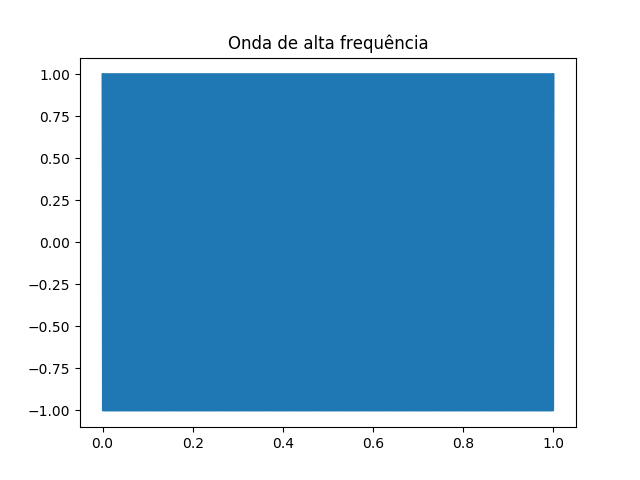

In [5]:
plt.clf()
%matplotlib notebook
plt.title('Onda de alta frequência')
plt.plot(t,do)
plt.show()

Para evitar essa confusão na hora de visualizar, plotaremos as notas para um intervalo menor de tempo e apenas um intervalo correspondente das notas: 

<IPython.core.display.Javascript object>


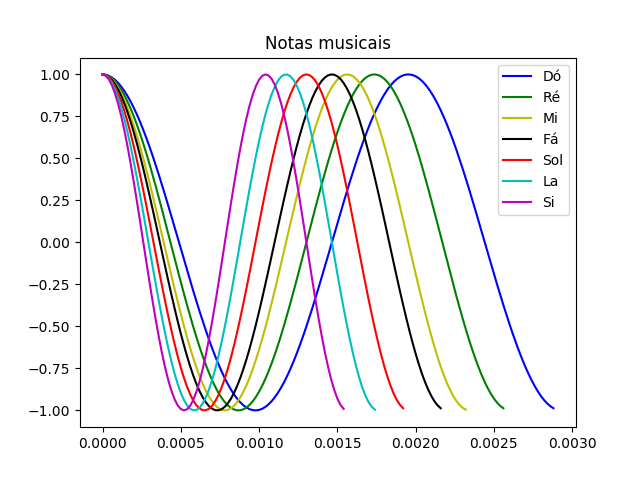

In [6]:
%matplotlib notebook
plt.clf() #apaga a figura anterior para começarmos uma nova
def achar_T_amostra(frequencia,array_tempo): # acha a amostra de tempo que contém o período T = 1/f da onda
    #vai ajudar a plotar só um período da onda
	import numpy as np
	T=1/frequencia
	for i in range(len(array_tempo)):
		if np.isclose(T,array_tempo[i],0.01):
			return i
			break

plt.title('Notas musicais')
linha_do = plt.plot(t[0:int(achar_T_amostra(512,t)*1.5)],do[0:int(achar_T_amostra(512,t)*1.5)],'b')
linha_re=plt.plot(t[0:int(achar_T_amostra(576,t)*1.5)],re[0:int(achar_T_amostra(576,t)*1.5)],'g')
linha_mi=plt.plot(t[0:int(achar_T_amostra(640,t)*1.5)],mi[0:int(achar_T_amostra(640,t)*1.5)],'y')
linha_fa=plt.plot(t[0:int(achar_T_amostra(682,t)*1.5)],fa[0:int(achar_T_amostra(682,t)*1.5)],'k')
linha_sol=plt.plot(t[0:int(achar_T_amostra(768,t)*1.5)],sol[0:int(achar_T_amostra(768,t)*1.5)],'r')
linha_la=plt.plot(t[0:int(achar_T_amostra(853,t)*1.5)],la[0:int(achar_T_amostra(853,t)*1.5)],'c')
linha_si=plt.plot(t[0:int(achar_T_amostra(960,t)*1.5)],si[0:int(achar_T_amostra(960,t)*1.5)],'m')
#plt.legend(('Dó','Ré','Mi','Fá','Sol','La','Si'),(linha_do,linha_re,linha_mi,linha_fa,linha_sol,linha_la,linha_si))
plt.legend(['Dó','Ré','Mi','Fá','Sol','La','Si'])
plt.show()